In [64]:
import os # 경로 지정 및 연산에 쓰기 위함
import re # regular expression: 주어진 규칙에 맞는 언어 연산 수행 위함
import pandas as pd # 데이터 처리 및 데이터 사이언스 위한 라이브러리
import tensorflow as tf # 데이터 다운받기 위함
from tensorflow.keras import utils # 데이터 다운받기 위함
from bs4 import BeautifulSoup # 글에 존재할지 모르는 html 태그 없애는 전처리 위함

In [65]:
# IMDB 데이터 다운로드
data_set = utils.get_file(
    fname = 'imdb.tar.gz', # 다운받은 파일의 이름 변경
    origin = 'http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz', # 다운받아올 파일 위치한 경로
    extract = True # 압축 풀 건지
)

In [66]:
def directory_data(directory):
  data = {}
  data["review"] = []
  for file_path in os.listdir(directory):
    with open(os.path.join(directory, file_path), "r", encoding='utf-8') as file:
      data["review"].append(file.read())
  return pd.DataFrame.from_dict(data)

def data(directory):
  pos_df = directory_data(os.path.join(directory, "pos"))
  neg_df = directory_data(os.path.join(directory, "neg"))
  pos_df["sentiment"] = 1
  neg_df["sentiment"] = 0
  return pd.concat([pos_df, neg_df]) # default: axis = 0

In [107]:
train_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "train"))
test_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "test"))

imdb_df = pd.concat([train_df, test_df])
imdb_df.head()

,review,sentiment
0,A great addition to anyone's collection.<br />...,1
1,I must admit a slight disappointment with this...,1
2,Strange yet emotionally disturbing chiller abo...,1
3,Samuel Fuller is hardly one of America's great...,1
4,OK... this movie so far has been slated by cri...,1


In [68]:
from nltk.corpus import stopwords # 불용어(stopwords) 사전 가져옴
import nltk

In [69]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [70]:
set_stopwords = set(stopwords.words('english')) # 영어로된 불용어 가져와 집합으로 구성

In [71]:
# 리뷰글 받아서 쓸데없는 부분 없애는 함수
def preprocessing(review, remove_stopwords = True):
    review_text = BeautifulSoup(review, 'html5lib').get_text() # html 태그 제거
    review_text = re.sub('[^a-zA-Z]', ' ', review_text) # a-z, A-Z 제외하고(^) 전부 다 ' '(공백)으로 대체

    # 불용어 제거
    if remove_stopwords:
        words = review_text.split() # 단어들로 쪼개 words 리스트에 넣어줌

        words = [w for w in words if not w in set_stopwords]

        review_text = ' '.join(words) # join: 리스트의 원소들 전부 다 붙여줌 (' '을 사이에 두고)

    review_text = review_text.lower() # 대소문자 비교는 감정판단과 관련 없으므로 대문자를 모두 소문자로 변경

    return review_text

In [72]:
reviews = list(imdb_df['review'])

reviews = [preprocessing(r) for r in reviews]
print(reviews[0])

<ipython-input-71-4e08e0f11d25>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(review, 'html5lib').get_text() # html 태그 제거


a great addition anyone collection monkeys movie see every day it excellent actors go excellent story this normal role bruce willis holds role like holds john mcclane the virus kills everyone earth leaves hundred survivors story new one story takes fresh new direction a man bruce sent back time get information virus wiped man kind the actors awesome i must give mention brad pitt hilarious mental patient james cole bruce meets mental hospital the director amazing job bringing us disturbing picture future devastated man made virus the animals seen virus world made feel like run world humans driven underground facilities this movie excellent must see also must i much highly recommend


In [73]:
tokenized_reviews = [r.split() for r in reviews]
print(tokenized_reviews[0])

['a', 'great', 'addition', 'anyone', 'collection', 'monkeys', 'movie', 'see', 'every', 'day', 'it', 'excellent', 'actors', 'go', 'excellent', 'story', 'this', 'normal', 'role', 'bruce', 'willis', 'holds', 'role', 'like', 'holds', 'john', 'mcclane', 'the', 'virus', 'kills', 'everyone', 'earth', 'leaves', 'hundred', 'survivors', 'story', 'new', 'one', 'story', 'takes', 'fresh', 'new', 'direction', 'a', 'man', 'bruce', 'sent', 'back', 'time', 'get', 'information', 'virus', 'wiped', 'man', 'kind', 'the', 'actors', 'awesome', 'i', 'must', 'give', 'mention', 'brad', 'pitt', 'hilarious', 'mental', 'patient', 'james', 'cole', 'bruce', 'meets', 'mental', 'hospital', 'the', 'director', 'amazing', 'job', 'bringing', 'us', 'disturbing', 'picture', 'future', 'devastated', 'man', 'made', 'virus', 'the', 'animals', 'seen', 'virus', 'world', 'made', 'feel', 'like', 'run', 'world', 'humans', 'driven', 'underground', 'facilities', 'this', 'movie', 'excellent', 'must', 'see', 'also', 'must', 'i', 'much',

In [74]:
review_len_by_words = [len(t) for t in tokenized_reviews]
print(review_len_by_words[0])

111


In [75]:
reviews[0].replace(' ', '')

'agreatadditionanyonecollectionmonkeysmovieseeeverydayitexcellentactorsgoexcellentstorythisnormalrolebrucewillisholdsrolelikeholdsjohnmcclanetheviruskillseveryoneearthleaveshundredsurvivorsstorynewonestorytakesfreshnewdirectionamanbrucesentbacktimegetinformationviruswipedmankindtheactorsawesomeimustgivementionbradpitthilariousmentalpatientjamescolebrucemeetsmentalhospitalthedirectoramazingjobbringingusdisturbingpicturefuturedevastatedmanmadevirustheanimalsseenvirusworldmadefeellikerunworldhumansdrivenundergroundfacilitiesthismovieexcellentmustseealsomustimuchhighlyrecommend'

In [76]:
review_len_by_alphabets = [len(s.replace(' ', '')) for s in reviews] # 리뷰 원문에서 빈칸 다 없앤 뒤
print(review_len_by_alphabets[0]) # 글자 수 세기

579


In [77]:
# 시각화
import matplotlib.pyplot as plt

Text(0, 0.5, 'Number of Reviews')

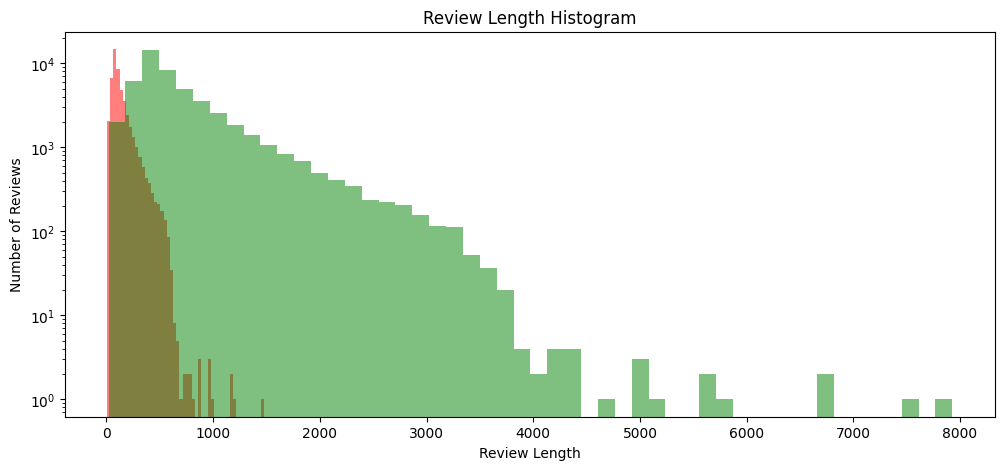

In [78]:
plt.figure(figsize = (12, 5))
plt.hist(review_len_by_words, bins = 50, alpha = 0.5, color = 'r') # alpha: 투명도
plt.hist(review_len_by_alphabets, bins = 50, alpha = 0.5, color = 'g')
plt.yscale('log', nonpositive = 'clip') # 음수값 잘라 양수값만 나오게끔, y축 log scale로 설정 → log scale 주는 이유: 리뷰 수 적은 것에 대한 것도 자세히 보기 위함
plt.title('Review Length Histogram')
plt.xlabel('Review Length')
plt.ylabel("Number of Reviews")

In [79]:
import numpy as np

In [80]:
print('최대 단어 수를 가지는 문장은 몇 개의 단어인가? ', np.max(review_len_by_words))
print('최소 단어 수를 가지는 문장은 몇 개의 단어인가? ', np.min(review_len_by_words))
print('평균적으로 몇 개의 단어를 가지는가? ', np.mean(review_len_by_words))
print('문장에 있는 단어들 수의 표준편차는? ', np.std(review_len_by_words))
print('문장에 있는 단어들 수의 중간값은? ', np.median(review_len_by_words))
print('문장의 하위 10% 길이는? ', np.percentile(review_len_by_words, 10))

최대 단어 수를 가지는 문장은 몇 개의 단어인가?  1481
최소 단어 수를 가지는 문장은 몇 개의 단어인가?  4
평균적으로 몇 개의 단어를 가지는가?  129.72192
문장에 있는 단어들 수의 표준편차는?  96.15245286269925
문장에 있는 단어들 수의 중간값은?  97.0
문장의 하위 10% 길이는?  51.0


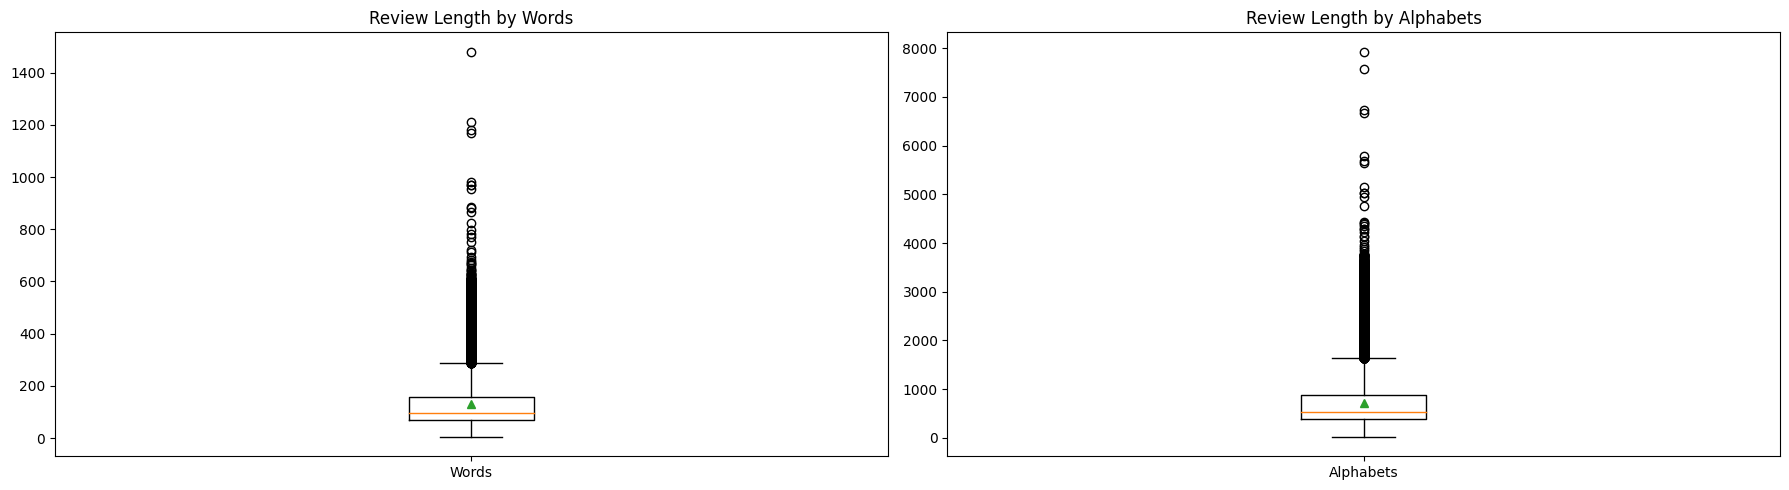

In [81]:
plt.figure(figsize = (18, 5))

plt.subplot(1, 2, 1)
plt.boxplot(review_len_by_words, showmeans=True) # 녹색 삼각형으로 평균 표시
plt.title('Review Length by Words')
plt.xticks([1], ['Words'])

plt.subplot(1, 2, 2)
plt.boxplot(review_len_by_alphabets, showmeans=True)
plt.title('Review Length by Alphabets')
plt.xticks([1], ['Alphabets'])

plt.tight_layout()
plt.show()

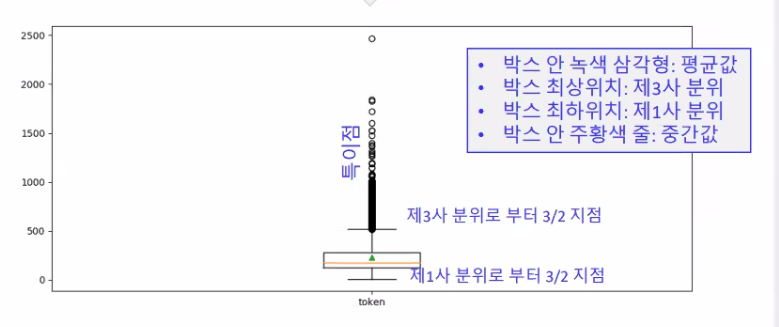

In [82]:
# WordCloud 그리기
from wordcloud import WordCloud, STOPWORDS

In [84]:
print(' '.join(['a', 'b', 'c'])) # 리스트의 각 요소를 공백으로 띄면서 각각 합침

a b c


In [85]:
wordcloud = WordCloud(stopwords = STOPWORDS, background_color='black', width=800, height=600).generate(' '.join(reviews))

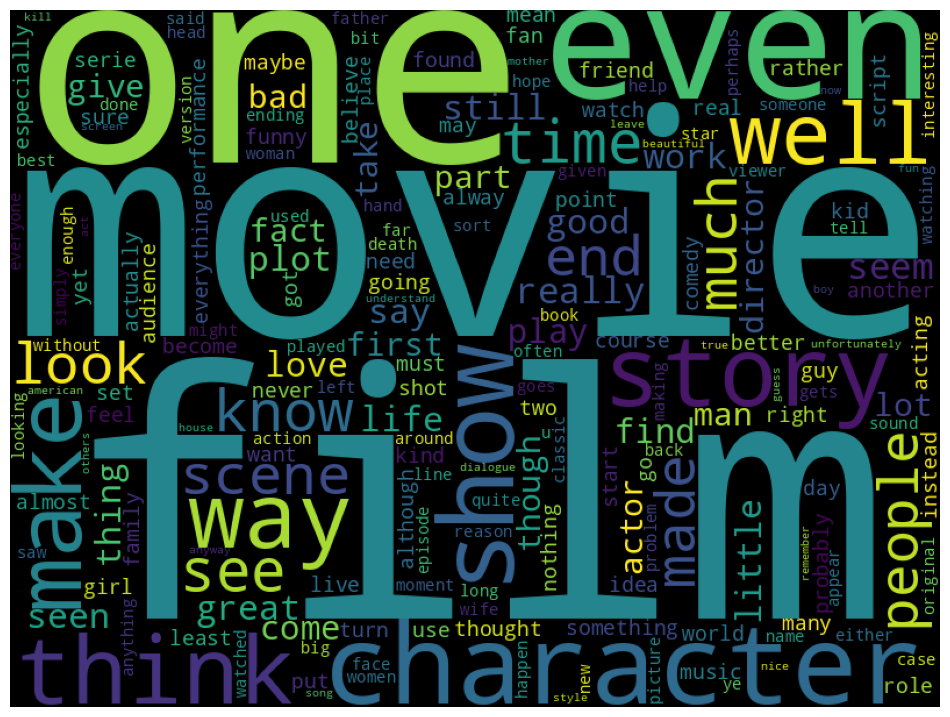

In [89]:
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [90]:
import seaborn as sns

In [103]:
imdb_df

,review,sentiment
0,A great addition to anyone's collection.<br />...,1
1,I must admit a slight disappointment with this...,1
2,Strange yet emotionally disturbing chiller abo...,1
3,Samuel Fuller is hardly one of America's great...,1
4,OK... this movie so far has been slated by cri...,1
...,...,...
12495,<br /><br />I tuned into this movie not becaus...,0
12496,"This is, in simple terms, one of the worst fil...",0
12497,Uuuuaaa! Barf! Yuk! Yuk! Disgusting! Puke City...,0
12498,"OK, here's the short of it... this movie is fu...",0


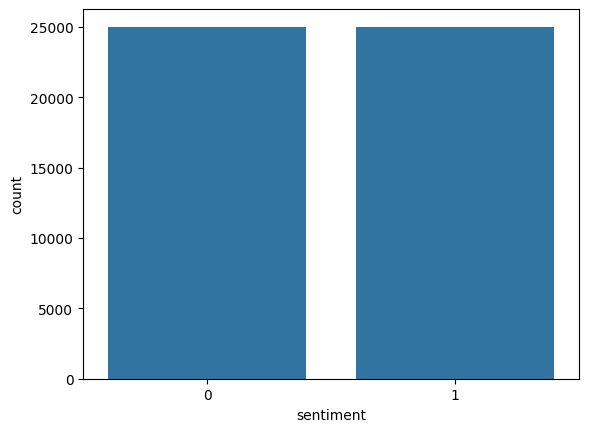

In [109]:
sentiment = imdb_df['sentiment'].value_counts()
sns.countplot(data = imdb_df, x = 'sentiment')
plt.show()

In [95]:
sentiment

sentiment
1    25000
0    25000
Name: count, dtype: int64